# Laboratorio: Clasificador de Canciones de Spotify

## Profesor: Ing. Valentín Barco

## Alumno: Iván Gonzalo Tapia

## Introducción
En este laboratorio, nos enfocaremos en un conjunto de datos repleto de atributos clave de distintas canciones. La meta es establecer a través de herramientas de aprendizaje automático, un clasificador que pueda predecir las inclinaciones musicales de un individuo y predecir si disfrutará o no de una determinada canción.

## Conjunto de datos
Se proporcionará un archivo en formato CSV que alberga un conjunto de datos con 16 columnas. De estas, 13 representan atributos específicos de las canciones. Además, se incluyen columnas dedicadas al nombre de la canción y al artista respectivamente. La columna "destino" actúa como etiqueta, indicando las preferencias del usuario: un valor de "1" significa que la canción fue del agrado del usuario, mientras que un "0" indica lo contrario. Los atributos que caracterizan cada pista son:

1. **Danceability (Bailabilidad):** Describe cuán adecuada es una pista para bailar basada en una combinación de elementos musicales, incluyendo el tempo, la estabilidad del ritmo y la fuerza del ritmo. Una puntuación de 0.0 es menos bailable y 1.0 es más bailable.

2. **Energy (Energía):** Representa una medida perceptiva de intensidad y actividad. Las pistas con mucha energía suelen sentirse rápidas, ruidosas y rítmicas. Por ejemplo, el death metal tiene alta energía, mientras que un preludio de Bach tiene una puntuación baja en el espectro de energía.

3. **Loudness (Volumen):** Es una medida general de la sonoridad de una pista en decibeles (dB). Las pistas sonoras tienen un valor promedio más alto.

4. **Speechiness (Hablado):** Detecta la presencia de palabras habladas en una pista. Los valores más cercanos a 1.0 sugieren que la pista contiene más palabras habladas, valores por encima de 0.66 describen pistas que son probablemente hechas completamente de palabras habladas. Los valores entre 0.33 y 0.66 describen pistas que pueden contener música y palabras. Valores por debajo de 0.33 sugieren música o pistas no habladas.

5. **Acousticness (Acústica):** Una medida de cuán acústica es una pista. Una puntuación de 1.0 significa que es muy probable que la pista sea acústica.

6. **Instrumentalness (Instrumentalidad):** Predice si una pista no contiene voces. Los valores más cercanos a 1.0 significan que es muy probable que la pista sea instrumental, mientras que valores cercanos a 0.5 indican que la pista puede contener contenido vocal.

7. **Liveness (En vivo):** Detecta la presencia de una audiencia en la grabación. Valores más altos representan una mayor probabilidad de que la pista haya sido interpretada en vivo. Un valor por encima de 0.8 proporciona una gran probabilidad de que la pista esté en vivo.

8. **Valence (Valencia):** Describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, feliz, alegre, eufórico), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, triste, deprimido, enojado).

9. **Tempo:** Es la velocidad general o ritmo de una pista y se deriva directamente de la duración promedio de la barra. Se mide en pulsos por minuto (BPM).


## 1- Importación de Librerías, Carga de Datos y Preprocesamiento de Datos.

En esta sección, se describen los pasos iniciales para el desarrollo del proyecto, que incluyen la importación de librerías, carga de datos, y preprocesamiento.

### Librerías necesarias para el desarrollo del proyecto
Se importaron las siguientes librerías necesarias:

```python
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
```

### Carga de Datos

Se cargaron los datos desde el archivo CSV 'Canciones_Spotify.csv' y se creó un DataFrame.

### Preprocesamiento de Datos

El DataFrame se saneará en caso de que contenga valores NaN o no numéricos. Se aplicaron las siguientes transformaciones:

### Selección de Variables de Entrada

Se probaron varias variables de entrada, pero se seleccionaron las que se consideraron más relevantes a lo largo de diferentes pruebas técnicas ('acousticness', 'danceability', 'energy', 'instrumentalness', 'speechiness', 'valence', 'tempo') entre otras.

También se opto por crear diferentes X para las variables de entrada, ya que se observo que algunos modelos se comportaban de mejor manera con diferentes datos de entrada.

### Split de Datos

Los datos se dividieron en conjuntos de entrenamiento y prueba utilizando la funcion de SKLear TrainTestSplit.

### Procesamiento de Datos
Se utilizó la codificación de etiquetas (Label Encoding de SKLearn) para convertir las etiquetas en números, este paso no era necesario para este proyecto, pero se realizo para mantener buenas practicas para cuando creamos un modelo de Machine Learning.

In [1]:
# Librerias necesarias para el desarrollo del proyecto
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
# Directorio propio para importar el dataset de canciones
path_colab = '/content/drive/MyDrive/UPSO ML & BD/DatasetSpotify/Canciones_Spotify.csv'
path = 'Canciones_Spotify.csv'

In [3]:
df = pd.read_csv(path)   #cargar el archivo csv en un df
df_canciones = df.copy()  #copia del df original
df_canciones.head()

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1             4.0    0.588       1         Redbone  Childish Gambino  
2             4.0    0.173       1    Xanny Family            Future  
3             4.0    0.230       1  Master Of None       Beach House  
4             4.0    0.904       1  Parallel Lines       Junior Boys

In [4]:
df_canciones.tail()

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
2012          0.002690    1    0.1290    -3.501     1        0.333   74.976   
2013          0.001670    1    0.0528    -2.663     1        0.131  110.041   
2014          0.003990    0    0.2140    -2.467     1        0.107  150.082   
2015          0.677000    1    0.0913    -2.735     1        0.133  150.011   
2016          0.000039    9    0.2180    -6.221     1        0.141  190.013   

      time_signature  valence  target                            song_title  \
2012             4.0    0.211       0   Like A Bitch - Kill The Noise Remix   
2013             4.0    0.867       0                                 Candy   
2014             4.0    0.470       0  Habit - Dack Janiels & Wenzday Remix   
2015             4.0    0.623       0                         First Contact   
2016             4.0    0.402       0                    I Wanna Get Better   

              artist  
2012  Kill The Noise  
2013  Dillon Francis  
2014        Rain Man  
2015      Twin Moons  
2016       Bleachers

In [5]:
df_canciones.describe()

Unnamed: 0  acousticness  danceability   duration_ms       energy  \
count  2017.000000   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean   1008.000000      0.187590      0.618422  2.463062e+05     0.681577   
std     582.402066      0.259989      0.161029  8.198181e+04     0.210273   
min       0.000000      0.000003      0.122000  1.604200e+04     0.014800   
25%     504.000000      0.009630      0.514000  2.000150e+05     0.563000   
50%    1008.000000      0.063300      0.631000  2.292610e+05     0.715000   
75%    1512.000000      0.265000      0.738000  2.703330e+05     0.846000   
max    2016.000000      0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.000000     2.000000     0.092300    -8.394000     0.000000   
50%            0.000076     6.000000     0.127000    -6.248000     1.000000   
75%            0.054000     9.000000     0.247000    -4.746000     1.000000   
max            0.976000    11.000000     0.969000    -0.307000     1.000000   

       speechiness        tempo  time_signature      valence       target  
count  2017.000000  2017.000000     2017.000000  2017.000000  2017.000000  
mean      0.092664   121.603272        3.968270     0.496815     0.505702  
std       0.089931    26.685604        0.255853     0.247195     0.500091  
min       0.023100    47.859000        1.000000     0.034800     0.000000  
25%       0.037500   100.189000        4.000000     0.295000     0.000000  
50%       0.054900   121.427000        4.000000     0.492000     1.000000  
75%       0.108000   137.849000        4.000000     0.691000     1.000000  
max       0.816000   219.331000        5.000000     0.992000     1.000000

In [6]:
# SANITIZAR EL DF EN CASO DE QUE TENGA VALORES NAN, O DE TIPO QUE NO SEA NUMERICO
for columna in df_canciones.columns:
    # Aplica las transformaciones
    if pd.api.types.is_numeric_dtype(df_canciones[columna]):
        # Si la columna es de tipo numérico
        df_canciones[columna] = pd.to_numeric(df_canciones[columna], errors='coerce')
        #esta es una mascara que me genera un true si hay un nan, y sino hay nan me pone un false
        df_canciones = df_canciones.loc[~df_canciones[columna].isna()]
        #dropeo los NAN
        df_canciones = df_canciones.dropna()
        #aca voy a pasar todos los datos al tipo q corresponda y agregar las columnas que sean necesarias
        df_canciones[columna] = df_canciones[columna].astype(df_canciones[columna].dtype)

df_canciones

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1             0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2             0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3             0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4             0.512000    5    0.4390   -11.648     0       0.0694  174.004   
...                ...  ...       ...       ...   ...          ...      ...   
2012          0.002690    1    0.1290    -3.501     1       0.3330   74.976   
2013          0.001670    1    0.0528    -2.663     1       0.1310  110.041   
2014          0.003990    0    0.2140    -2.467     1       0.1070  150.082   
2015          0.677000    1    0.0913    -2.735     1       0.1330  150.011   
2016          0.000039    9    0.2180    -6.221     1       0.1410  190.013   

      time_signature  valence  target                            song_title  \
0                4.0    0.286       1                              Mask Off   
1                4.0    0.588       1                               Redbone   
2                4.0    0.173       1                          Xanny Family   
3                4.0    0.230       1                        Master Of None   
4                4.0    0.904       1                        Parallel Lines   
...              ...      ...     ...                                   ...   
2012             4.0    0.211       0   Like A Bitch - Kill The Noise Remix   
2013             4.0    0.867       0                                 Candy   
2014             4.0    0.470       0  Habit - Dack Janiels & Wenzday Remix   
2015             4.0    0.623       0                         First Contact   
2016             4.0    0.402       0                    I Wanna Get Better   

                artist  
0               Future  
1     Childish Gambino  
2               Future  
3          Beach House  
4          Junior Boys  
...                ...  
2012    Kill The Noise  
2013    Dillon Francis  
2014          Rain Man  
2015        Twin Moons  
2016         Bleachers  

[2017 rows x 17 columns]

In [7]:
X= df_canciones[['acousticness', 'danceability',	'energy',	'instrumentalness','speechiness', 'valence', 'tempo']].to_numpy()
y= df_canciones[['target']].to_numpy().ravel()
y
# Split de datos de entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.4, random_state=42)

In [8]:
X_train.shape

(1210, 7)

In [9]:
y_train.shape

(1210,)

In [10]:
X2= df_canciones[['danceability','instrumentalness', 'speechiness', 'loudness', 'acousticness', 'energy']].to_numpy()

X2_train, X2_test, y_train, y_test= train_test_split(X2, y, test_size= 0.4, random_state=42)

In [11]:
X3= df_canciones[['danceability','instrumentalness', 'speechiness', 'acousticness', 'energy']].to_numpy()

X3_train, X3_test, y_train, y_test= train_test_split(X3, y, test_size= 0.4, random_state=42)

In [12]:
X4= df_canciones[['danceability', 'energy' ,'tempo']].to_numpy()
X4_train, X4_test, y_train, y_test= train_test_split(X4, y, test_size= 0.4, random_state=42)

In [107]:
# Procesamiento de datos para que queden en el formato aceptable por los modelos, esto no es necesario pero es una buena practica
le = preprocessing.LabelEncoder()          # Instancio un objeto de la clase LabelEncoder() labelencoder es pasar los tituos de las labels con texto a numeros
y = le.fit_transform(y)             # Transformo las etiquetas a números(utilizo esa instancia para hacer la transformacion de datos(categorias) a numeros)
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## 2- Visualizacion de los datos con Seaborn + Matplotlib

En esta sección, se lleva a cabo la visualización de los datos para obtener información sobre las columnas que se utilizarán en el entrenamiento.

### Graficar Datos con Pairplot
Se utilizó la biblioteca `Seaborn` para generar un gráfico Pairplot. El Pairplot permite visualizar la relación entre todas las variables del conjunto de datos.

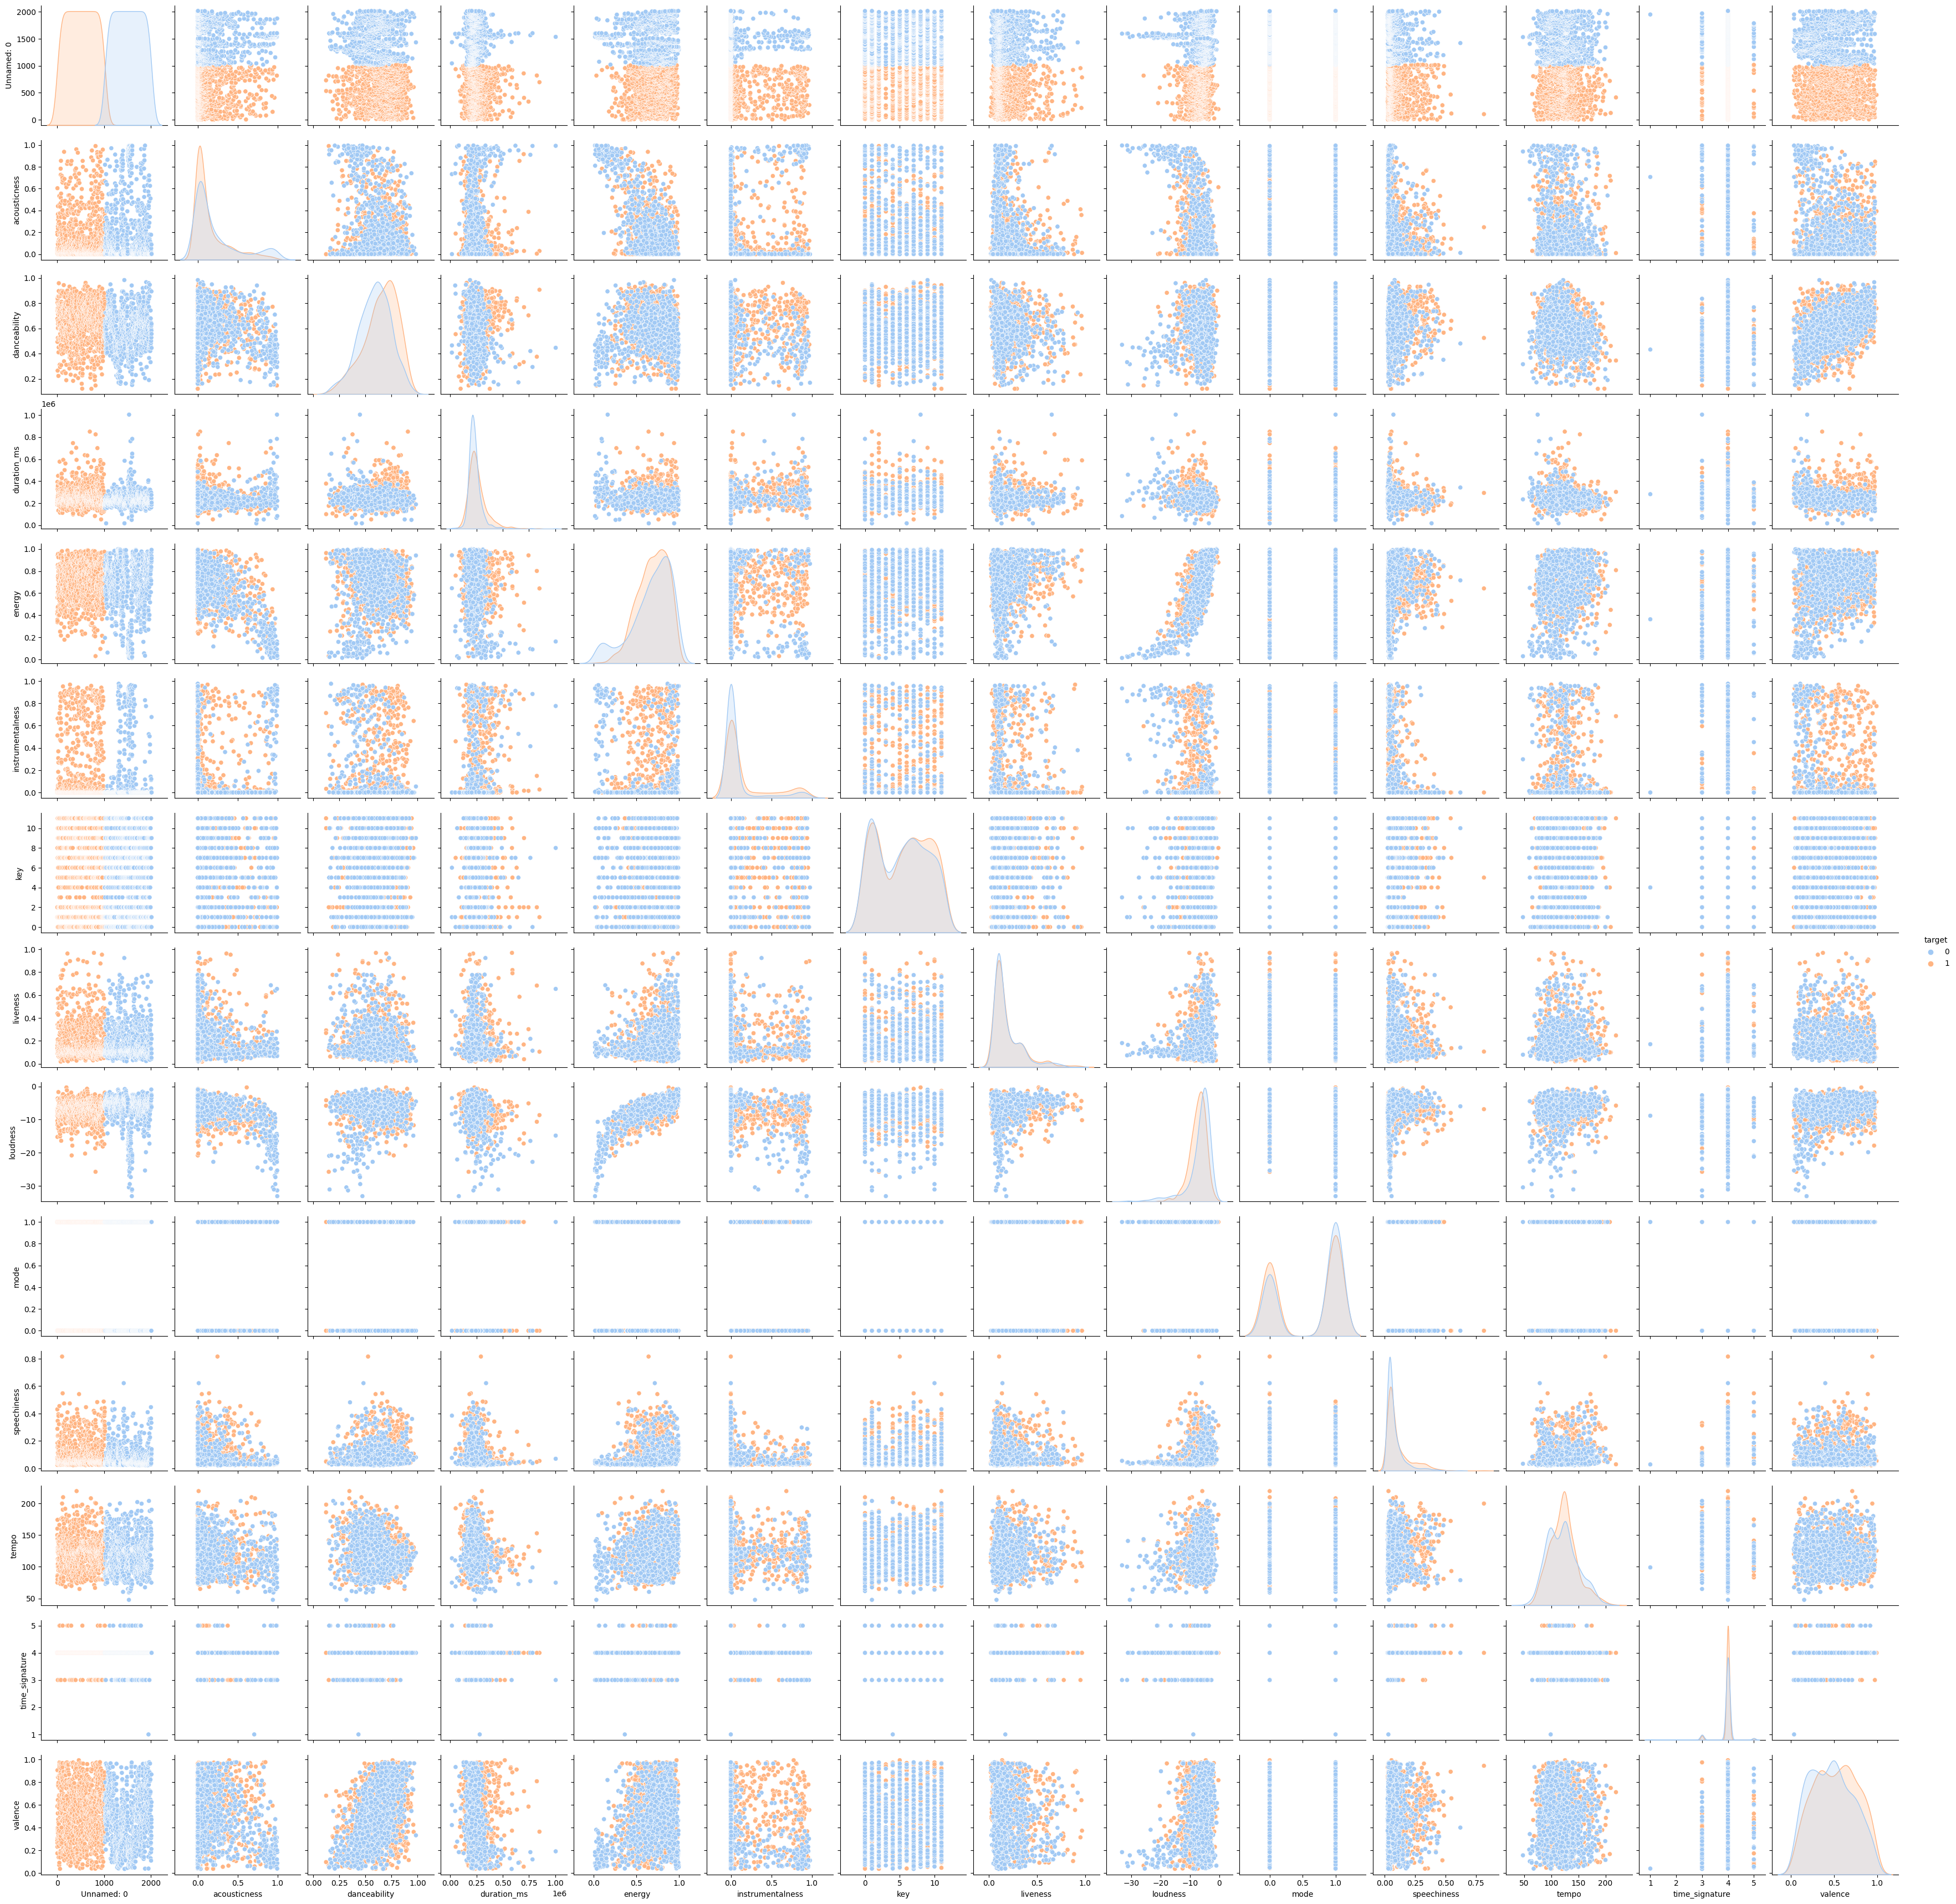

In [ ]:
# Grafico los datos de todo el DF con pairplot para tener una idea de las columnas q voy a usar para el entrenamiento
sns.pairplot(hue = 'target' ,data = df_canciones, palette = 'pastel')
plt.show()

## 3- Creacion de Modelos con SKLearn, Funcion para evaluar los modelos obtener las metricas y graficar la matriz de confusion

En esta sección, se realizará la creación de modelos de Machine Learning utilizando la biblioteca `SKLearn`. Además, se proporciona una función para evaluar los modelos y obtener métricas de rendimiento, así como para graficar la matriz de confusión.

### Creación de Modelos

Para crear modelos de Machine Learning, se utilizó la biblioteca `SKLearn`. Esta biblioteca proporciona una amplia gama de algoritmos de aprendizaje automático, lo que facilita la creación de modelos.


### *Funcion para evaluar los modelos con Validacion simple, cruzada, y crear la matriz de confusion.*

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

def evaluar_modelo(modelo, X_test, y_test):
    # Realizar predicciones en el conjunto de prueba
    y_pred = modelo.predict(X_test)

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calcular la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)


    # Mostrar las métricas y la matriz de confusión
    print("Accuracy:", accuracy)
    print("Precisión:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)

    # Crear un mapa de calor para la matriz de confusión
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.title("Matriz de Confusión")
    plt.xlabel("Clase Predicha")
    plt.ylabel("Clase Real")
    plt.show()

def validacion_cruzada(modelo, X_train, y_train):
    # Calcular el cross validation score
    scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='accuracy')
    print("Cross Validation Score:", np.mean(scores))


### 1- **KNN**

Cross Validation Score: 0.6380165289256198
Accuracy: 0.6381660470879802
Precisión: 0.660427807486631
Recall: 0.5995145631067961
F1-Score: 0.6284987277353689


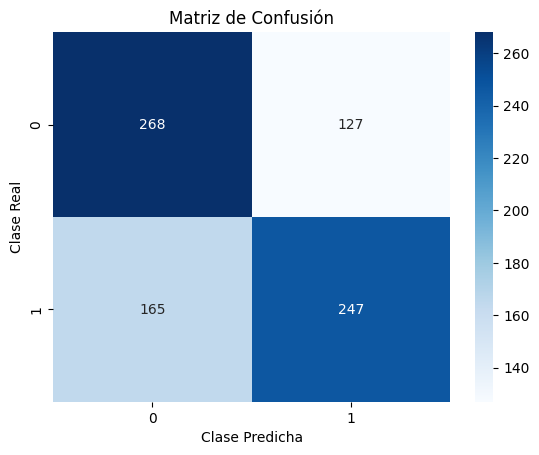

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Crear un clasificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el valor de n_neighbors

# Entrenar el modelo con los datos de entrenamiento
knn_classifier.fit(X3_train, y_train)  # X_train son los atributos, y_train es el target

# Realizar predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X3_test)

# Calcular las métricas
validacion_cruzada(knn_classifier, X3_train, y_train)
evaluar_modelo(knn_classifier, X3_test, y_test)

### 2- **SVM**

Accuracy: 0.6728624535315985
Precisión: 0.7215568862275449
Recall: 0.5849514563106796
F1-Score: 0.646112600536193
Cross Validation Score: 0.6636363636363637


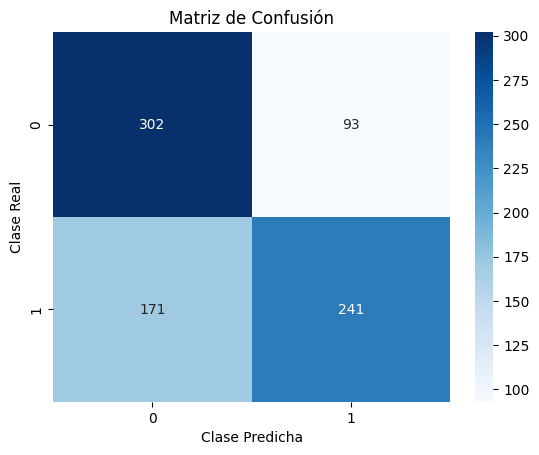

In [17]:
from sklearn.svm import SVC

# Crear un clasificador SVM
svm_classifier = SVC(kernel='linear')  # Puedes ajustar el kernel según tus necesidades (lineal, polinómico, radial, etc.)

# Entrenar el modelo con los datos de entrenamiento
svm_classifier.fit(X2_train, y_train)  # X_train son los atributos, y_train es el target

# Evaluacion del modelo
evaluar_modelo(svm_classifier, X2_test, y_test, X2_train, y_train)

### 3- **DecissionTree**

Cross Validation Score: 0.7289256198347107
Accuracy: 0.7311028500619579
Precisión: 0.6985743380855397
Recall: 0.8325242718446602
F1-Score: 0.7596899224806202


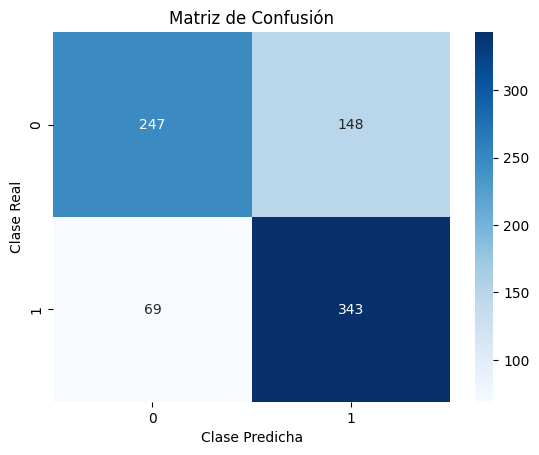

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Crear un clasificador tree classifier
tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Entrenar el modelo con los datos de entrenamiento
tree_classifier.fit(X_train, y_train)  # Asume que tienes X_train como atributos y y_train como etiquetas

# Evaluacion del modelo
validacion_cruzada(tree_classifier, X_train, y_train)
evaluar_modelo(tree_classifier, X_test, y_test)

### 4- **Naive Bayes**

Accuracy: 0.6505576208178439
Precisión: 0.7070063694267515
Recall: 0.5388349514563107
F1-Score: 0.6115702479338843
Cross Validation Score: 0.6330578512396694


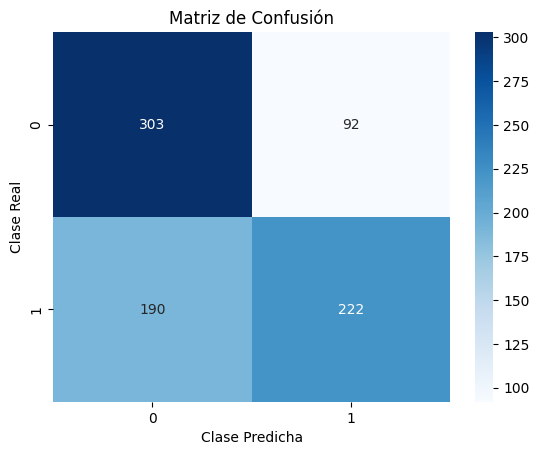

In [19]:
from sklearn.naive_bayes import GaussianNB

# Crea un clasificador Naive Bayes (Gaussian Naive Bayes)
naive_bayes_classifier = GaussianNB()

# Entrena el modelo con los datos de entrenamiento
naive_bayes_classifier.fit(X3_train, y_train)

# Evaluacion del modelo
evaluar_modelo(naive_bayes_classifier, X3_test, y_test, X3_train, y_train)

### 5- **RandomForest**

Cross Validation Score: 0.7380165289256199
Accuracy: 0.758364312267658
Precisión: 0.7627118644067796
Recall: 0.7645631067961165
F1-Score: 0.7636363636363637


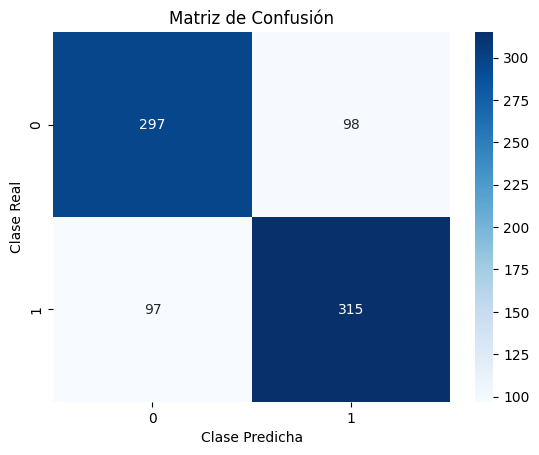

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Crear un clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=0)  # Puedes ajustar el número de estimadores

# Entrenar el modelo con los datos de entrenamiento
rf_classifier.fit(X_train, y_train)  # X_train son los atributos, y_train es el target

# Evaluacion del modelo
validacion_cruzada(rf_classifier, X_train, y_train)
evaluar_modelo(rf_classifier, X_test, y_test)

### 6- **Logistic Regression** (Non linear regression)

Cross Validation Score: 0.6504132231404959
Accuracy: 0.667905824039653
Precisión: 0.6836734693877551
Recall: 0.6504854368932039
F1-Score: 0.6666666666666666


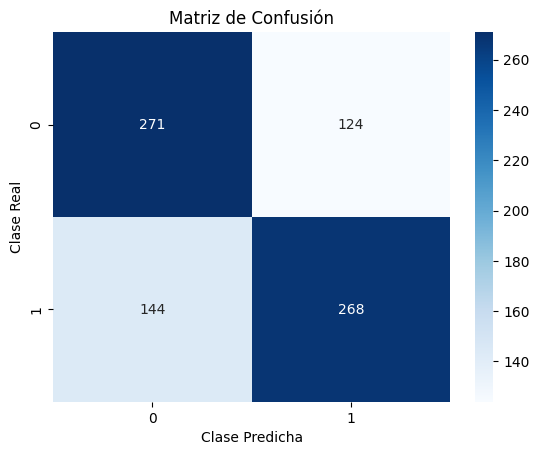

In [44]:
from sklearn.linear_model import LogisticRegression

# Crear un clasificador de regresión logística
logistic_classifier = LogisticRegression(solver='liblinear', random_state=0)  # Puedes ajustar el solver según tus necesidades

# Entrenar el modelo con los datos de entrenamiento
logistic_classifier.fit(X2_train, y_train)  # X_train son los atributos, y_train es el target

# Evaluacion del modelo
validacion_cruzada(logistic_classifier, X2_train, y_train)
evaluar_modelo(logistic_classifier, X2_test, y_test)

### 7- **GradientBoostingClassifier**

Cross Validation Score: 0.7297520661157024
Accuracy: 0.7521685254027262
Precisión: 0.7548076923076923
Recall: 0.7621359223300971
F1-Score: 0.7584541062801932


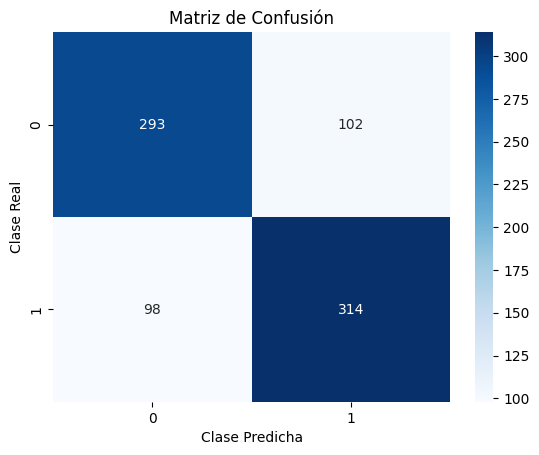

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear un clasificador Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=0)  # Puedes ajustar los hiperparámetros según tus necesidades

# Entrenar el modelo con los datos de entrenamiento
gb_classifier.fit(X2_train, y_train)  # X_train son los atributos, y_train es el target

# Evaluacion del modelo
validacion_cruzada(gb_classifier, X2_train, y_train)
evaluar_modelo(gb_classifier, X2_test, y_test)

### 8- **MLPClassifier**

Cross Validation Score: 0.7115702479338843
Accuracy: 0.7075588599752168
Precisión: 0.7838709677419354
Recall: 0.5898058252427184
F1-Score: 0.6731301939058171


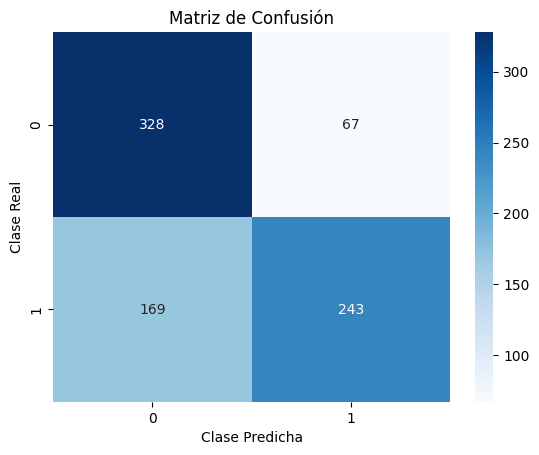

In [46]:
from sklearn.neural_network import MLPClassifier

# Crear un clasificador MLP (Perceptrón Multicapa)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=0)  # Ajusta la arquitectura y hiperparámetros según tus necesidades

# Entrenar el modelo con los datos de entrenamiento
mlp_classifier.fit(X3_train, y_train)  # X_train son los atributos, y_train es el target

# Evaluacion del modelo
validacion_cruzada(mlp_classifier, X3_train, y_train)
evaluar_modelo(mlp_classifier, X3_test, y_test)

### 9- **AdaBoostClassifier**

Cross Validation Score: 0.6768595041322314
Accuracy: 0.7162329615861215
Precisión: 0.7340153452685422
Recall: 0.6966019417475728
F1-Score: 0.7148194271481942


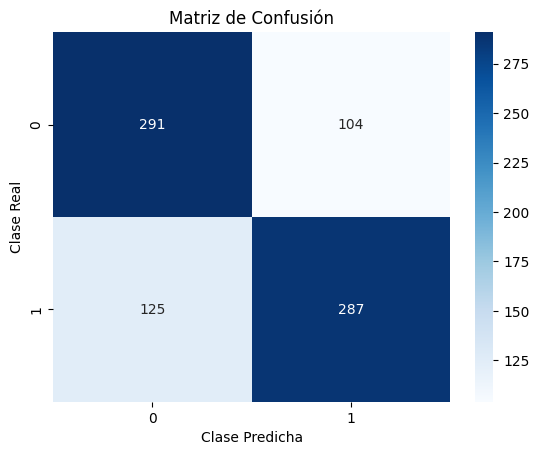

In [47]:
from sklearn.ensemble import AdaBoostClassifier

# Crear un clasificador AdaBoost
ada_classifier = AdaBoostClassifier(n_estimators=40, random_state=0)  # Puedes ajustar el número de estimadores según tus necesidades

# Entrenar el modelo con los datos de entrenamiento
ada_classifier.fit(X_train, y_train)  # X_train son los atributos, y_train es el target

# Evaluacion del modelo
validacion_cruzada(ada_classifier, X_train, y_train)
evaluar_modelo(ada_classifier, X_test, y_test)

### 10- **SVC**(Super Vector Classifier)

Cross Validation Score: 0.6636363636363637
Accuracy: 0.6728624535315985
Precisión: 0.7215568862275449
Recall: 0.5849514563106796
F1-Score: 0.646112600536193


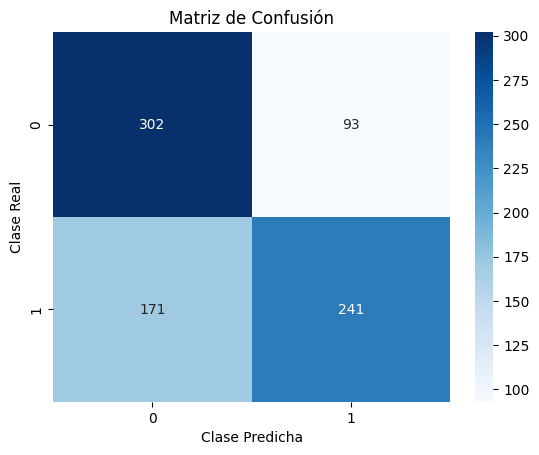

In [48]:
from sklearn.svm import SVC

# Crear un clasificador Support Vector Classifier
svc_classifier = SVC(kernel='linear')  # Puedes ajustar el kernel según tus necesidades (lineal, polinómico, radial, etc.)

# Entrenar el modelo con los datos de entrenamiento
svc_classifier.fit(X2_train, y_train)  # X_train son los atributos, y_train es el target

# Evaluacion del modelo
validacion_cruzada(svc_classifier, X2_train, y_train)
evaluar_modelo(svc_classifier, X2_test, y_test)

## 4- Creacion de Modelos con TF Keras


In [24]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

# Crear un modelo de red neuronal en TensorFlow y Keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train, epochs=30, batch_size=32)

# Realizar predicciones en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Epoch 1/30
38/38 [==============================] - 1s 1ms/step - loss: 3.9910 - accuracy: 0.4793
Epoch 2/30
38/38 [==============================] - 0s 978us/step - loss: 0.7585 - accuracy: 0.4983
Epoch 3/30
38/38 [==============================] - 0s 937us/step - loss: 0.7058 - accuracy: 0.4975
Epoch 4/30
38/38 [==============================] - 0s 951us/step - loss: 0.7106 - accuracy: 0.4893
Epoch 5/30
38/38 [==============================] - 0s 951us/step - loss: 0.7239 - accuracy: 0.5091
Epoch 6/30
38/38 [==============================] - 0s 925us/step - loss: 0.7093 - accuracy: 0.4917
Epoch 7/30
38/38 [==============================] - 0s 976us/step - loss: 0.7087 - accuracy: 0.5207
Epoch 8/30
38/38 [==============================] - 0s 940us/step - loss: 0.7379 - accuracy: 0.4860
Epoch 9/30
38/38 [==============================] - 0s 924us/step - loss: 0.7185 - accuracy: 0.5099
Epoch 10/30
38/38 [==============================] - 0s 951us/step - loss: 0.7084 - accuracy: 0.5207
E

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

# Define las entradas
input_layer = keras.layers.Input(shape=(X_train.shape[1],))

# Capa oculta 1
hidden1 = keras.layers.Dense(64, activation='relu')(input_layer)

# Capa oculta 2
hidden2 = keras.layers.Dense(64, activation='relu')(hidden1)

# Capa de salida
output_layer = keras.layers.Dense(1, activation='sigmoid')(hidden2)

# Crea el modelo funcional
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Compila el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train, epochs=30, batch_size=32)

# Realiza predicciones en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)


Epoch 1/30
38/38 [==============================] - 2s 2ms/step - loss: 0.8697 - accuracy: 0.5025
Epoch 2/30
38/38 [==============================] - 0s 2ms/step - loss: 0.7785 - accuracy: 0.5025
Epoch 3/30
38/38 [==============================] - 0s 2ms/step - loss: 0.7394 - accuracy: 0.4884
Epoch 4/30
38/38 [==============================] - 0s 2ms/step - loss: 0.7271 - accuracy: 0.5165
Epoch 5/30
38/38 [==============================] - 0s 2ms/step - loss: 0.7221 - accuracy: 0.5140
Epoch 6/30
38/38 [==============================] - 0s 2ms/step - loss: 0.7449 - accuracy: 0.5025
Epoch 7/30
38/38 [==============================] - 0s 2ms/step - loss: 0.7142 - accuracy: 0.5355
Epoch 8/30
38/38 [==============================] - 0s 3ms/step - loss: 0.7186 - accuracy: 0.5397
Epoch 9/30
38/38 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5455
Epoch 10/30
38/38 [==============================] - 0s 3ms/step - loss: 0.7334 - accuracy: 0.5140
Epoch 11/30
38/38 [

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

# Crear un modelo de red neuronal en TensorFlow y Keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),  # Agregar una capa de dropout para regularización
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train, epochs=30, batch_size=32)

# Realizar predicciones en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)


Epoch 1/30
38/38 [==============================] - 1s 2ms/step - loss: 3.6027 - accuracy: 0.4942
Epoch 2/30
38/38 [==============================] - 0s 2ms/step - loss: 1.2494 - accuracy: 0.5050
Epoch 3/30
38/38 [==============================] - 0s 2ms/step - loss: 0.9314 - accuracy: 0.4967
Epoch 4/30
38/38 [==============================] - 0s 2ms/step - loss: 0.7964 - accuracy: 0.4818
Epoch 5/30
38/38 [==============================] - 0s 2ms/step - loss: 0.7316 - accuracy: 0.4992
Epoch 6/30
38/38 [==============================] - 0s 2ms/step - loss: 0.7157 - accuracy: 0.4983
Epoch 7/30
38/38 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.5074
Epoch 8/30
38/38 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.5008
Epoch 9/30
38/38 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5091
Epoch 10/30
38/38 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5107
Epoch 11/30
38/38 [

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

# Crear una lista de modelos individuales (puedes ajustar la arquitectura según tus necesidades)
models = []
for _ in range(5):  # Puedes ajustar el número de modelos individuales
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')  # Para clasificación binaria
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    models.append(model)

# Entrenar los modelos individuales
for model in models:
    model.fit(X_train, y_train, epochs=10, batch_size=32)

# Realizar predicciones en el conjunto de prueba y combinar las predicciones
y_preds = [model.predict(X_test) for model in models]
y_pred = (tf.reduce_mean(y_preds, axis=0) > 0.5).numpy().flatten()  # Promedio y decisión de votación

# Calcular la precisión del ensemble
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del ensemble de TensorFlow:", accuracy)


Epoch 1/10
38/38 [==============================] - 1s 2ms/step - loss: 1.8133 - accuracy: 0.5008
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.7313 - accuracy: 0.4992
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5421
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.7384 - accuracy: 0.4975
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.5140
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.5264
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.7284 - accuracy: 0.5099
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.5380
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5421
Epoch 10/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5471
Epoch 1/10
38/38 [=

## 5- Ajustar Hiper Parametros de los mejores modelos.

### Decission Tree

d:\Users\Ivan\Desktop\proyectos_local\BigData\Proyecto2_Spotify\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
140 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Users\Ivan\Desktop\proyectos_local\BigData\Proyecto2_Spotify\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Users\Ivan\Desktop\proyectos_local\BigData\Proyecto2_Spotify\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "d:\Users\Ivan\Desktop\proyectos_local\B

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 5}
Accuracy: 0.711276332094176
Precisión: 0.7243107769423559
Recall: 0.7014563106796117
F1-Score: 0.7127003699136869


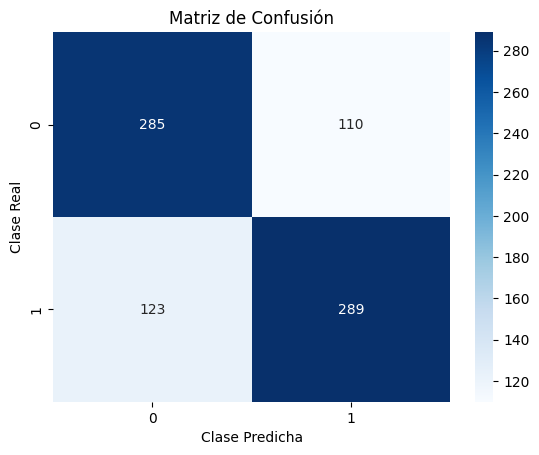

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold

# # Establece una semilla para la validación cruzada
# random_seed = 42

# # Define el clasificador DecisionTreeClassifier
# tree_classifier = DecisionTreeClassifier(random_state=random_seed)

# Define una cuadrícula de hiperparámetros que deseas buscar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 15, 17, 20],
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Crea un objeto KFold con la semilla para la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Crea un objeto GridSearchCV con KFold
grid_search = GridSearchCV(tree_classifier, param_grid, cv=kf, scoring='accuracy')

# Realiza la búsqueda en la cuadrícula utilizando tus datos de entrenamiento
grid_search.fit(X_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evalúa el modelo con los mejores hiperparámetros en los datos de prueba
best_tree_classifier = grid_search.best_estimator_
evaluar_modelo(best_tree_classifier, X_test, y_test)


Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 3}
Accuracy: 0.7311028500619579
Precisión: 0.6985743380855397
Recall: 0.8325242718446602
F1-Score: 0.7596899224806202


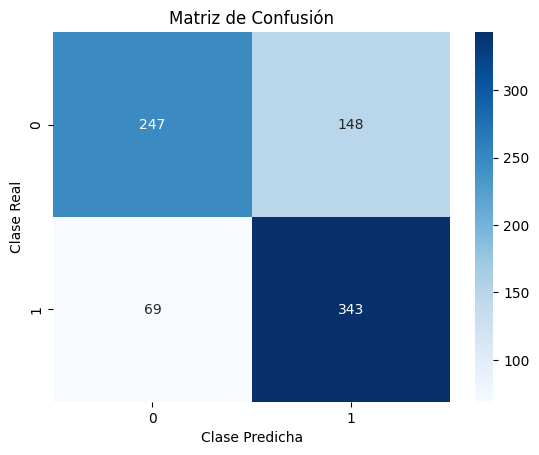

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

# Define una distribución de hiperparámetros para la búsqueda aleatoria
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': scipy.stats.randint(1, 35),
    'min_samples_split': scipy.stats.randint(2, 25)
}

# Crea un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(tree_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Realiza la búsqueda aleatoria utilizando tus datos de entrenamiento
random_search.fit(X_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Evalúa el modelo con los mejores hiperparámetros en los datos de prueba
best_tree_classifier2 = random_search.best_estimator_
evaluar_modelo(best_tree_classifier2, X_test, y_test )


### RandomForest

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.758364312267658
Precisión: 0.7614457831325301
Recall: 0.7669902912621359
F1-Score: 0.7642079806529625


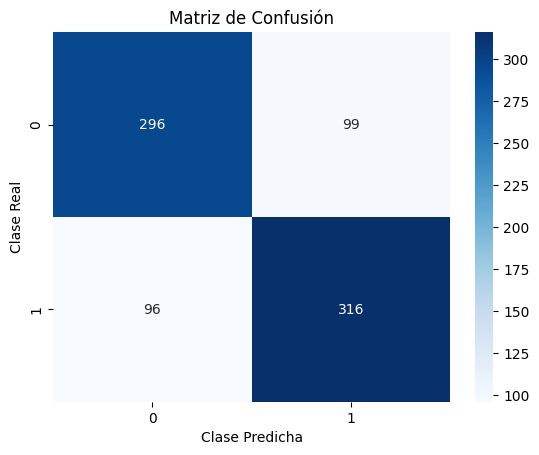

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define una cuadrícula de hiperparámetros que deseas buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5],
    'criterion': ['gini', 'entropy']
}

# Crea un objeto GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Realiza la búsqueda en la cuadrícula utilizando tus datos de entrenamiento
grid_search.fit(X_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evalúa el modelo con los mejores hiperparámetros en los datos de prueba
best_rf_classifier = grid_search.best_estimator_
evaluar_modelo(best_rf_classifier, X_test, y_test)


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats


# Define una distribución de hiperparámetros para la búsqueda aleatoria
param_dist = {
    'n_estimators': scipy.stats.randint(100, 500),
    'max_depth': scipy.stats.randint(1, 50),
    'min_samples_split': scipy.stats.randint(2, 20),
    'min_samples_leaf': [1, 2, 4, 5],
    'criterion': ['gini', 'entropy']
}

# Crea un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)

# Realiza la búsqueda aleatoria utilizando tus datos de entrenamiento
random_search.fit(X_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Evalúa el modelo con los mejores hiperparámetros en los datos de prueba
best_rf_classifier2 = random_search.best_estimator_
evaluar_modelo(best_rf_classifier2, X_test, y_test)


KeyboardInterrupt: 

### GradientBoostingClassifier

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Accuracy: 0.7571251548946716
Precisión: 0.7621359223300971
Recall: 0.7621359223300971
F1-Score: 0.762135922330097


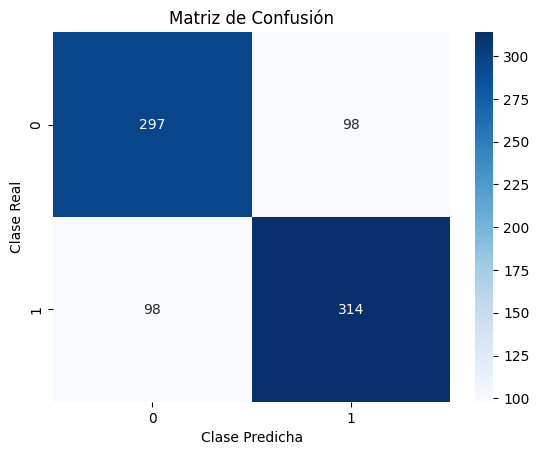

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define una cuadrícula de hiperparámetros que deseas buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Crea un objeto GridSearchCV
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy')

# Realiza la búsqueda en la cuadrícula utilizando tus datos de entrenamiento
grid_search.fit(X_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evalúa el modelo con los mejores hiperparámetros en los datos de prueba
best_gb_classifier = grid_search.best_estimator_
evaluar_modelo(best_gb_classifier, X_test, y_test)

Mejores hiperparámetros: {'learning_rate': 0.07234221521788219, 'max_depth': 6, 'n_estimators': 153}
Accuracy: 0.7509293680297398
Precisión: 0.7617866004962779
Recall: 0.7451456310679612
F1-Score: 0.7533742331288343


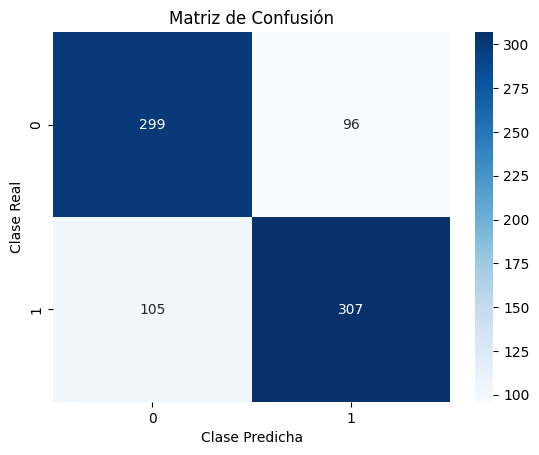

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

# Define una distribución de hiperparámetros para la búsqueda aleatoria
param_dist = {
    'n_estimators': scipy.stats.randint(100, 500),
    'max_depth': scipy.stats.randint(1, 50),
    'learning_rate': scipy.stats.uniform(0.01, 0.2)
}

# Crea un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(best_gb_classifier, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)

# Realiza la búsqueda aleatoria utilizando tus datos de entrenamiento
random_search.fit(X_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Evalúa el modelo con los mejores hiperparámetros en los datos de prueba
best_gb_classifier2 = random_search.best_estimator_
evaluar_modelo(best_gb_classifier2, X_test, y_test)


### AdaBostClassifier

Mejores hiperparámetros: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy: 0.7323420074349443
Precisión: 0.748730964467005
Recall: 0.7160194174757282
F1-Score: 0.7320099255583126


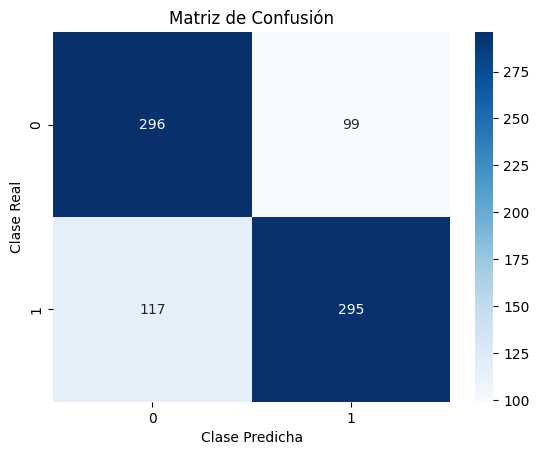

In [97]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define una cuadrícula de hiperparámetros que deseas buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Crea un objeto GridSearchCV
grid_search = GridSearchCV(ada_classifier, param_grid, cv=5, scoring='accuracy')

# Realiza la búsqueda en la cuadrícula utilizando tus datos de entrenamiento
grid_search.fit(X2_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evalúa el modelo con los mejores hiperparámetros en los datos de prueba
best_ada_classifier = grid_search.best_estimator_
evaluar_modelo(best_ada_classifier, X2_test, y_test)


Mejores hiperparámetros: {'learning_rate': 0.05820509320520235, 'n_estimators': 493}
Accuracy: 0.7323420074349443
Precisión: 0.7474747474747475
Recall: 0.7184466019417476
F1-Score: 0.7326732673267327


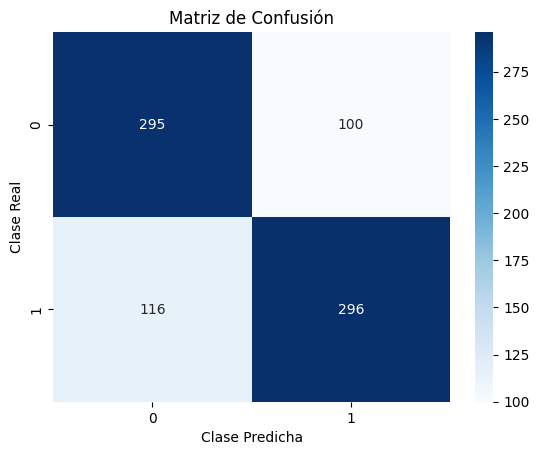

In [90]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

# Define una distribución de hiperparámetros para la búsqueda aleatoria.
param_dist = {
    'n_estimators': scipy.stats.randint(50, 500),
    'learning_rate': scipy.stats.uniform(0.01, 0.2)
}

# Crea un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(ada_classifier, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)

# Realiza la búsqueda aleatoria utilizando tus datos de entrenamiento
random_search.fit(X2_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Evalúa el modelo con los mejores hiperparámetros en los datos de prueba
best_ada_classifier2 = random_search.best_estimator_
evaluar_modelo(best_ada_classifier2, X2_test, y_test)


## 6- Ensable + métricas

Accuracy: 0.7596034696406444
Precision: 0.7599837113220013
Recall: 0.7596034696406444
F1-Score: 0.7596256183818171


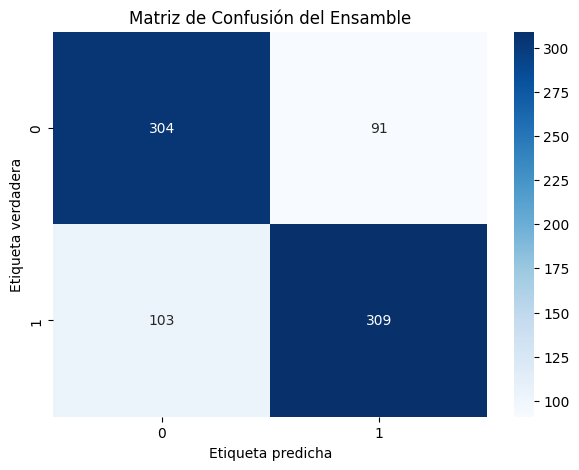

In [102]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes tus modelos preentrenados knn, svm, naive_bayes y decision_tree

# Realiza predicciones con cada modelo en el conjunto de prueba
best_tree_classifier2_predictions = best_tree_classifier2.predict(X_test)
best_rf_classifier_predictions = best_rf_classifier.predict(X_test)
best_gb_classifier_predictions = best_gb_classifier.predict(X_test)
best_ada_classifier_predictions = best_ada_classifier.predict(X2_test)

# ENSAMBLE POR VOTACIÓN
final_predictions = []
# Ensamble hecho a mano sin utilizar sklearn votingclassifier
for dt, rf, gb, ada in zip(best_tree_classifier2_predictions, best_rf_classifier_predictions, best_gb_classifier_predictions, best_ada_classifier_predictions):
    votes = {0: 0, 1: 0, 2: 0}
    votes[dt] += 1
    votes[rf] += 1
    votes[gb] += 1
    votes[ada] += 1

    majority_vote = max(votes, key=votes.get)
    final_predictions.append(majority_vote)


# Calcular las métricas
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions, average='weighted')
recall = recall_score(y_test, final_predictions, average='weighted')
f1 = f1_score(y_test, final_predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Calcular y mostrar la matriz de confusión
c = confusion_matrix(y_test, final_predictions)

plt.figure(figsize=(7, 5))
sns.heatmap(c, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión del Ensamble')
plt.show()


Accuracy: 0.7546468401486989
Precision: 0.7675
Recall: 0.7451456310679612
F1-Score: 0.7561576354679803


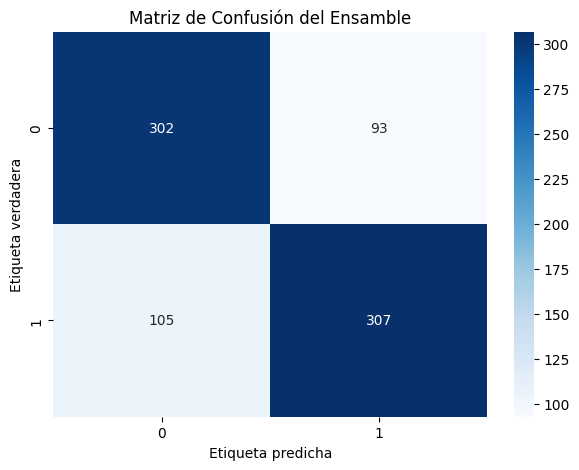

In [105]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Crear el ensamblado por votación mayoritaria utilizando votingclassifier de sklearn
ensemble_model = VotingClassifier(estimators=[
    ('TreeClassifier', best_tree_classifier2),
    ('RandomForest', best_rf_classifier),
    ('GradientBoosting', best_gb_classifier),
    ('AdaBoostClassifier', best_ada_classifier)
], voting='hard')  # 'hard' para votación mayoritaria

# Entrenar el ensamblado (no necesitas volver a entrenar los modelos individuales)
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
# Realizar predicciones con el ensamblado
y_pred = ensemble_model.predict(X_test)  # X_test es tu conjunto de prueba

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Ahora puedes imprimir o utilizar las métricas y la matriz de confusión
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

plt.figure(figsize=(7, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión del Ensamble')
plt.show()


## 7. Ensambles y pruebas


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Crear un clasificador base (por ejemplo, un árbol de decisión)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Crear un clasificador AdaBoost
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=0)

# Entrenar el modelo con los datos de entrenamiento
adaboost_classifier.fit(X2_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = adaboost_classifier.predict(X2_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo AdaBoost:", accuracy)

Precisión del modelo AdaBoost: 0.7149938042131351


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Crear un clasificador Gradient Boosting
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0)

# Entrenar el modelo con los datos de entrenamiento
gradient_boosting_classifier.fit(X2_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = gradient_boosting_classifier.predict(X2_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo Gradient Boosting:", accuracy)

Precisión del modelo Gradient Boosting: 0.7534076827757125


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Crear los tres modelos
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=0)
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0)

# Entrenar cada modelo con los datos de entrenamiento
rf_classifier.fit(X_train, y_train)
adaboost_classifier.fit(X_train, y_train)
gradient_boosting_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba para cada modelo
y_pred_rf = rf_classifier.predict(X_test)
y_pred_adaboost = adaboost_classifier.predict(X_test)
y_pred_gradient_boosting = gradient_boosting_classifier.predict(X_test)

# Combinar las predicciones de los tres modelos (promedio)
y_pred_ensemble = (y_pred_rf + y_pred_adaboost + y_pred_gradient_boosting) / 3

# Redondear las predicciones a 0 o 1 (dependiendo de un umbral)
y_pred_ensemble = (y_pred_ensemble > 0.5).astype(int)

# Calcular la precisión del ensamble
accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Precisión del ensamble:", accuracy)

Precisión del ensamble: 0.7558859975216853


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score

# Crear los modelos
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=0)
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0)


# Entrenar los modelos
rf_classifier.fit(X_train, y_train)
adaboost_classifier.fit(X_train, y_train)
gradient_boosting_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba para cada modelo
y_pred_rf = rf_classifier.predict(X_test)
y_pred_adaboost = adaboost_classifier.predict(X_test)
y_pred_gradient_boosting = gradient_boosting_classifier.predict(X_test)



# Combinar las puntuaciones de decisión de los modelos y el SVM (promedio)
ensemble_scores = ( y_pred_rf + y_pred_adaboost + y_pred_gradient_boosting) / 4

# Convertir las puntuaciones a predicciones (por ejemplo, usando un umbral)
y_pred_ensemble = (ensemble_scores > 0).astype(int)

# Calcular la precisión del ensamble
accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Precisión del ensamble:", accuracy)


Precisión del ensamble: 0.7410161090458488


In [ ]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión del ensamble
confusion = confusion_matrix(y_test, y_pred_ensemble)

print("Matriz de Confusión del Ensamble:")
print(confusion)

Matriz de Confusión del Ensamble:
[[253 142]
 [ 67 345]]


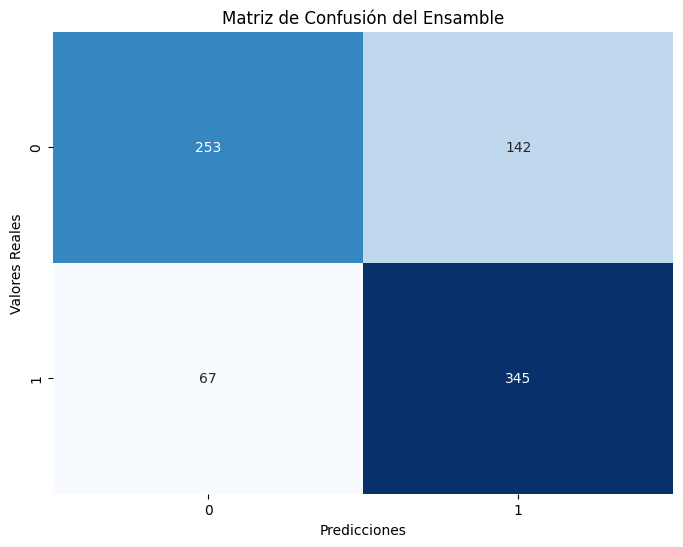

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn puede hacer que la matriz de confusión se vea más atractiva

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_ensemble)

# Crear una figura de tamaño adecuado
plt.figure(figsize=(8, 6))

# Utilizar seaborn para plotear la matriz de confusión
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)

# Configurar etiquetas de los ejes
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión del Ensamble')

# Mostrar el gráfico
plt.show()


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.9 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Crear los modelos
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=0)
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
svm_classifier = SVC(kernel='linear', probability=True)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=0)
lgbm_classifier = LGBMClassifier(n_estimators=100, random_state=0)
catboost_classifier = CatBoostClassifier(iterations=100, random_state=0, verbose=0)  # Ajusta los hiperparámetros según tus necesidades

# Entrenar los modelos
rf_classifier.fit(X_train, y_train)
adaboost_classifier.fit(X_train, y_train)
gradient_boosting_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
lgbm_classifier.fit(X_train, y_train)
catboost_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba para cada modelo
y_pred_rf = rf_classifier.predict(X_test)
y_pred_adaboost = adaboost_classifier.predict(X_test)
y_pred_gradient_boosting = gradient_boosting_classifier.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_lgbm = lgbm_classifier.predict(X_test)
y_pred_catboost = catboost_classifier.predict(X_test)

# Combinar las predicciones de los modelos (promedio)
y_pred_ensemble = (y_pred_rf + y_pred_adaboost + y_pred_gradient_boosting + y_pred_svm + y_pred_xgb + y_pred_lgbm + y_pred_catboost) / 7

# Redondear las predicciones a 0 o 1 (dependiendo de un umbral)
y_pred_ensemble = (y_pred_ensemble > 0.5).astype(int)

# Calcular la precisión del ensamble
accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Precisión del ensamble con XGBoost, LightGBM y CatBoost:", accuracy)


[LightGBM] [Info] Number of positive: 608, number of negative: 602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 1210, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502479 -> initscore=0.009917
[LightGBM] [Info] Start training from score 0.009917
Precisión del ensamble con XGBoost, LightGBM y CatBoost: 0.7521685254027262


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Crear un modelo XGBoost
xgb_classifier = XGBClassifier(n_estimators=100, random_state=0)  # Ajusta los hiperparámetros según tus necesidades

# Entrenar el modelo con los datos de entrenamiento
xgb_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_xgb = xgb_classifier.predict(X_test)

# Calcular la precisión del modelo XGBoost
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Precisión del modelo XGBoost:", accuracy)


Precisión del modelo XGBoost: 0.748451053283767


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Crear un modelo LightGBM
lgbm_classifier = LGBMClassifier(n_estimators=100, random_state=0)  # Ajusta los hiperparámetros según tus necesidades

# Entrenar el modelo con los datos de entrenamiento
lgbm_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lgbm = lgbm_classifier.predict(X_test)

# Calcular la precisión del modelo LightGBM
accuracy = accuracy_score(y_test, y_pred_lgbm)
print("Precisión del modelo LightGBM:", accuracy)


[LightGBM] [Info] Number of positive: 608, number of negative: 602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 1210, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502479 -> initscore=0.009917
[LightGBM] [Info] Start training from score 0.009917
Precisión del modelo LightGBM: 0.7447335811648079


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Crear un modelo CatBoost
catboost_classifier = CatBoostClassifier(iterations=100, random_state=0, verbose=0)  # Ajusta los hiperparámetros según tus necesidades

# Entrenar el modelo con los datos de entrenamiento
catboost_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_catboost = catboost_classifier.predict(X_test)

# Calcular la precisión del modelo CatBoost
accuracy = accuracy_score(y_test, y_pred_catboost)
print("Precisión del modelo CatBoost:", accuracy)


Precisión del modelo CatBoost: 0.7571251548946716


In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Crear los modelos
xgb_classifier = XGBClassifier(n_estimators=100, random_state=0)
lgbm_classifier = LGBMClassifier(n_estimators=100, random_state=0)
catboost_classifier = CatBoostClassifier(iterations=100, random_state=0, verbose=0)

# Crear el ensamble de votación
voting_classifier = VotingClassifier(estimators=[
    ('xgb', xgb_classifier),
    ('lgbm', lgbm_classifier),
    ('catboost', catboost_classifier)
], voting='soft')  # 'soft' para votación basada en probabilidad

# Entrenar el ensamble
voting_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_ensemble = voting_classifier.predict(X_test)

# Calcular la precisión del ensamble
accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Precisión del ensamble con votación:", accuracy)



[LightGBM] [Info] Number of positive: 608, number of negative: 602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 1210, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502479 -> initscore=0.009917
[LightGBM] [Info] Start training from score 0.009917
Precisión del ensamble con votación: 0.7608426270136307


In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# Crear los modelos
xgb_classifier = XGBClassifier(n_estimators=100, random_state=0)
lgbm_classifier = LGBMClassifier(n_estimators=100, random_state=0)
catboost_classifier = CatBoostClassifier(iterations=100, random_state=0, verbose=0)

# Crear el ensamble de votación
voting_classifier = VotingClassifier(estimators=[
    ('xgb', xgb_classifier),
    ('lgbm', lgbm_classifier),
    ('catboost', catboost_classifier)
], voting='soft')

# Realizar validación cruzada
cv_scores = cross_val_score(voting_classifier, X_train, y_train, cv=5, scoring=make_scorer(accuracy_score))

# Imprimir los resultados de validación cruzada
print("Puntuaciones de Validación Cruzada:", cv_scores)
print("Precisión Promedio:", cv_scores.mean())


[LightGBM] [Info] Number of positive: 487, number of negative: 481
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1738
[LightGBM] [Info] Number of data points in the train set: 968, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503099 -> initscore=0.012397
[LightGBM] [Info] Start training from score 0.012397
[LightGBM] [Info] Number of positive: 487, number of negative: 481
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1731
[LightGBM] [Info] Number of data points in the train set: 968, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503099 -> initscore=0.012397
[LightGBM] [Info] Start training from score 0.012397
[LightGBM] [Info] Number of po

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.metrics import make_scorer, accuracy_score

# Crear los modelos
xgb_classifier = XGBClassifier()
lgbm_classifier = LGBMClassifier()
catboost_classifier = CatBoostClassifier(verbose=0)

# Crear el ensamble de votación
voting_classifier = VotingClassifier(estimators=[
    ('xgb', xgb_classifier),
    ('lgbm', lgbm_classifier),
    ('catboost', catboost_classifier)
], voting='soft')

# Definir el espacio de búsqueda de hiperparámetros
param_space = {
    'xgb__n_estimators': Integer(50, 200),  # Hiperparámetro específico de XGBoost
    'lgbm__n_estimators': Integer(50, 200),  # Hiperparámetro específico de LightGBM
    'catboost__iterations': Integer(50, 200),  # Hiperparámetro específico de CatBoost
}

# Realizar la optimización bayesiana
opt = BayesSearchCV(
    estimator=voting_classifier,
    search_spaces=param_space,
    scoring=make_scorer(accuracy_score),
    n_iter=50,  # Número de iteraciones de optimización
    cv=5,  # Número de divisiones de validación cruzada
    n_jobs=-1,  # Utilizar todos los núcleos disponibles
    verbose=0  # No mostrar información detallada
)

# Ajustar la búsqueda de hiperparámetros
opt.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", opt.best_params_)
print("Mejor precisión:", opt.best_score_)


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[LightGBM] [Info] Number of positive: 608, number of negative: 602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 1210, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502479 -> initscore=0.009917
[LightGBM] [Info] Start training from score 0.009917
Mejores hiperparámetros: OrderedDict([('catboost__iterations', 177), ('lgbm__n_estimators', 54), ('xgb__n_estimators', 50)])
Mejor precisión: 0.7429752066115702
